# Handout #4: Unsupervised Learning (hierarchical clustering)

## Problem 5

Load needed libraries

In [1]:
import numpy as np

### Load the *dataset*

Our group is '01'

In [2]:
group = '01'  # BERNAT LADARIA, Lluís
ds = 5

Load vectors from file

In [3]:
data = np.loadtxt('ds'+group+str(ds)+'.txt')

Split data and labels

In [4]:
X = data[:, 0:2]
y = data[:, 2]

How many vectors we have to classify?

In [5]:
X.shape

(1000, 2)

How many classes?

In [6]:
y_classes = np.unique(y)
y_classes

array([0., 1., 2.])

We have a 3 classes classification problem

### Cluster the data

Import necessary functions and classes

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import v_measure_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

In [8]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as col

Create the options lists to use

In [9]:
linkage_list = ['complete', 'average', 'ward']

In [10]:
n_clusters_list = [2, 3, 4, 5]

In [11]:
affinity_list = ['euclidean']

Prepare a models list and populate it with all the trials results

In [12]:
models_list = list()

for linkage, n_clusters, affinity in itertools.product(linkage_list, n_clusters_list, affinity_list):
    model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters, affinity=affinity)
    model.fit(X)
    
    entry = {
        'linkage': linkage,
        'n_clusters': n_clusters,
        'affinity': affinity,
        'model': model, 
        'v_measure_score': v_measure_score(labels_true=y, labels_pred=model.labels_),
        'davies_bouldin_score': davies_bouldin_score(X=X, labels=model.labels_)
    }
    models_list.append(entry)

Determine the best model for each algorithm (linkage)

The v_measure scores into a \[0 ,1\] interval the similarity between real and predicted labels.
A value near 1, denotes a good classification. The zero value is the worst case.
In the other side, the Davies-Bouldin internal measure, scores as zero the best clustering case.

So we must lookup for the **maximum V-measure index value** and the **minimum Davies-Bouldin index** case for each algorithm.

In [13]:
best_v_measure_dict = {}
best_davies_bouldin_dict = {}

for model in models_list:
    t = model['linkage']
    if t not in best_v_measure_dict or model['v_measure_score'] > best_v_measure_dict.get(t)['v_measure_score']:
        best_v_measure_dict[t] = model
    if t not in best_davies_bouldin_dict or model['davies_bouldin_score'] < best_davies_bouldin_dict.get(t)['davies_bouldin_score']:
        best_davies_bouldin_dict[t] = model

### V-measure score

In [14]:
best_v_measure_list = list(best_v_measure_dict.values())
best_v_measure_list

[{'linkage': 'complete',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='complete', n_clusters=3),
  'v_measure_score': 0.943473573294366,
  'davies_bouldin_score': 0.4971891054409023},
 {'linkage': 'average',
  'n_clusters': 4,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='average', n_clusters=4),
  'v_measure_score': 0.9439785661193727,
  'davies_bouldin_score': 0.6888499606015155},
 {'linkage': 'ward',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(n_clusters=3),
  'v_measure_score': 0.9434735732943661,
  'davies_bouldin_score': 0.4971891054409023}]

In short, the best V-measure score indicates that: 

- the best score for *complete-linkage* and *ward* algorithms are the **3 clusters** classifications
- the best score for *average-linkage* is a **4 cluters** classification

Now will select the best one according to the V_measure score

In [15]:
best_v_measure_model = None

for model in models_list:
    if best_v_measure_model is None or model['v_measure_score'] > best_v_measure_model['v_measure_score']:
        best_v_measure_model = model

In [16]:
best_v_measure_model

{'linkage': 'average',
 'n_clusters': 4,
 'affinity': 'euclidean',
 'model': AgglomerativeClustering(linkage='average', n_clusters=4),
 'v_measure_score': 0.9439785661193727,
 'davies_bouldin_score': 0.6888499606015155}

As we already know, it seems that the best V-measure scored case is the one with 4 clusters, using the *average-linkage* function

### Plot V-measure best clustering

Plotting data with original labels

To visualize the clustering results, will plot the samples, first with original labels and also in the new *best* cluster labels

First will calculate the maximum and minimum class values to get same color tones when plotting

In [17]:
y_best_v_measure_model_labels = best_v_measure_model['model'].labels_

plot_vmax=max(max(y_best_v_measure_model_labels), max(y_classes))
plot_vmin=min(min(y_best_v_measure_model_labels), min(y_classes))
print("range:", plot_vmin, plot_vmax)

range: 0 3


Plotting data with true labels (left plot) and with the *best* cassification obtained from V-measure scoring (the right plot)

Create an *ad-hoc* cmap (rgb hex list) for a better representation

In [18]:
paleta = col.LinearSegmentedColormap.from_list(
        'my_colors', ['#000000', '#ff0000', '#00ff00', '#0000ff'])

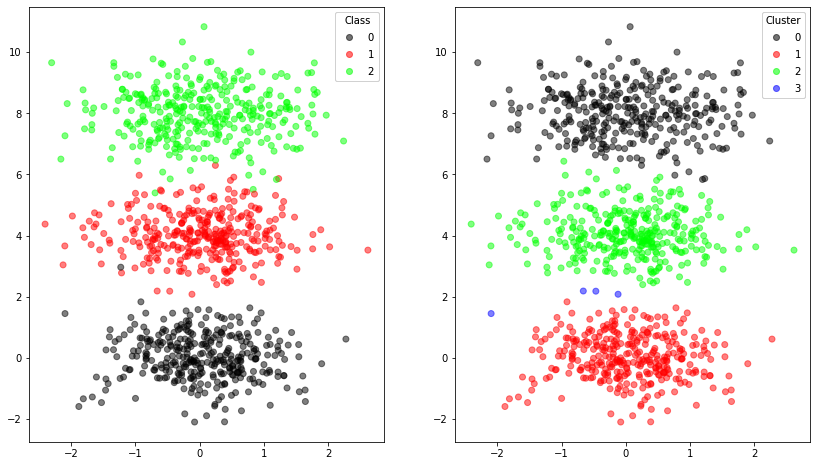

In [19]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
plt.subplot(1, 2, 1)
scatter = ax[0].scatter(x=X[:,0], y=X[:,1], c=y, alpha=0.5, cmap=paleta, vmin=plot_vmin, vmax=plot_vmax)
my_legend = ax[0].legend(*scatter.legend_elements(), loc="upper right", title="Class")
ax[0].add_artist(my_legend)
plt.subplot(1, 2, 2)
scatter = ax[1].scatter(x=X[:,0], y=X[:,1], c=y_best_v_measure_model_labels, alpha=0.5, cmap=paleta, vmin=plot_vmin, vmax=plot_vmax)
my_legend = ax[1].legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax[1].add_artist(my_legend)

As we already know, there are only three classes (with some outlier values)

Ummm, it seems that the *average* algorithm doesn't provide the correct clusters number.
Also the new *4th cluster* is formed by four outlier values. 
And other *border or outlier samples* are missclassified.

The contingency table will tell us more details

In [20]:
best_v_measure_model_contingency_matrix = contingency_matrix(labels_true=y, labels_pred=y_best_v_measure_model_labels)
best_v_measure_model_contingency_matrix

array([[  0, 332,   1,   1],
       [  2,   0, 328,   3],
       [327,   0,   6,   0]])

In [21]:
def pretty_print_cm(cm: np.ndarray, true_classes: list):
    line = '          '
    for j in range(1, cm.shape[1] + 1):
        line = line + (' Cluster {:2}'.format(j))
    print(line)
    for i, row in enumerate(cm):
        line = 'Class {:2}: '.format(int(true_classes[i])) + ''.join(''.join(['{:11}'.format(element) for element in row]))
        print(line)

In [22]:
pretty_print_cm(cm=best_v_measure_model_contingency_matrix, true_classes=y_classes)

           Cluster  1 Cluster  2 Cluster  3 Cluster  4
Class  0:           0        332          1          1
Class  1:           2          0        328          3
Class  2:         327          0          6          0


As seen in contingency table (looking up for the top values) the assignment of classes is as follows:

- Class 0 has been assigned to cluster 2
- Class 1 has been assigned to cluster 3
- Class 2 has been assigned to cluster 1

We can summarize the clustering errors as:

- Class 0 has 2 missclassified samples. One of them will be part of the *new* 4th cluster
- Class 1 has 5 missclassified samples. Three of them at 4th cluster
- Class 2 its the one with more missclassified samples. It has 6 samples assigned to class 1 (3rd cluster)

### Davies-Bouldin score

In [23]:
best_davies_bouldin_list = list(best_davies_bouldin_dict.values())
best_davies_bouldin_list

[{'linkage': 'complete',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='complete', n_clusters=3),
  'v_measure_score': 0.943473573294366,
  'davies_bouldin_score': 0.4971891054409023},
 {'linkage': 'average',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='average', n_clusters=3),
  'v_measure_score': 0.9397450891215053,
  'davies_bouldin_score': 0.4985242485963006},
 {'linkage': 'ward',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(n_clusters=3),
  'v_measure_score': 0.9434735732943661,
  'davies_bouldin_score': 0.4971891054409023}]

Top Davies-Bouldin score podium indicates that: 

- the *complete-linkage* and *ward* algorithms have the same best score. Both signaling a **3 clusters** partition
- the *average-linkage* has the second place in the podium. Also a **3 cluster** partition

Now will select the best one according to the Davies-Boudin score (there is a tie, so will select the first top score according dictionary order)

In [24]:
best_davies_bouldin_model = None

for model in models_list:
    if best_davies_bouldin_model is None or model['davies_bouldin_score'] < best_davies_bouldin_model['davies_bouldin_score']:
        best_davies_bouldin_model = model

In [25]:
best_davies_bouldin_model

{'linkage': 'complete',
 'n_clusters': 3,
 'affinity': 'euclidean',
 'model': AgglomerativeClustering(linkage='complete', n_clusters=3),
 'v_measure_score': 0.943473573294366,
 'davies_bouldin_score': 0.4971891054409023}

### Plot Davies-Bouldin best clustering

To visualize the clustering results, will plot the samples, first with original labels and also in the new *best* cluster labels

First will calculate the maximum and minimum class values to get same color tones when plotting

In [26]:
y_best_davies_bouldin_model_labels = best_davies_bouldin_model['model'].labels_

plot_vmax=max(max(y_best_davies_bouldin_model_labels), max(y_classes))
plot_vmin=min(min(y_best_davies_bouldin_model_labels), min(y_classes))
print("range:", plot_vmin, plot_vmax)

range: 0 2


Plotting data with true labels (left plot) and with the *best* cassification obtained from Davies-Bouldin scoring (the right plot)

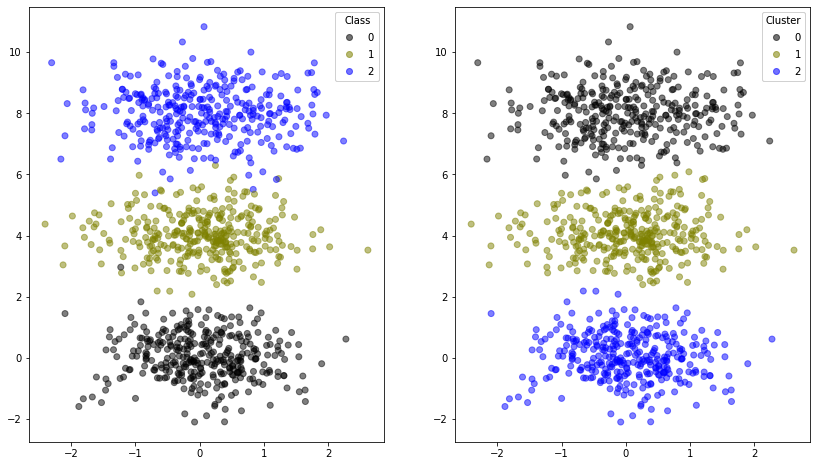

In [27]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
plt.subplot(1, 2, 1)
scatter = ax[0].scatter(x=X[:,0], y=X[:,1], c=y, alpha=0.5, cmap=paleta, vmin=plot_vmin, vmax=plot_vmax)
my_legend = ax[0].legend(*scatter.legend_elements(), loc="upper right", title="Class")
ax[0].add_artist(my_legend)
plt.subplot(1, 2, 2)
scatter = ax[1].scatter(x=X[:,0], y=X[:,1], c=y_best_davies_bouldin_model_labels, alpha=0.5, cmap=paleta, vmin=plot_vmin, vmax=plot_vmax)
my_legend = ax[1].legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax[1].add_artist(my_legend)

As we already know, there are only three classes (with some outlier values)

Ummm, it seems that there are some missclassified *border or outlier samples*

The contingency table will tell us more details

In [28]:
best_davies_bouldin_model_contingency_matrix = contingency_matrix(labels_true=y, labels_pred=y_best_davies_bouldin_model_labels)
best_davies_bouldin_model_contingency_matrix

array([[  0,   1, 333],
       [  2, 328,   3],
       [328,   5,   0]])

In [29]:
pretty_print_cm(cm=best_davies_bouldin_model_contingency_matrix, true_classes=y_classes)

           Cluster  1 Cluster  2 Cluster  3
Class  0:           0          1        333
Class  1:           2        328          3
Class  2:         328          5          0


As seen in contingency table (looking up for the max values) the assignment of classes is as follows:

- Class 0 has been assigned to cluster 3
- Class 1 has been assigned to cluster 2
- Class 2 has been assigned to cluster 1

We can summarize the clustering errors as:

- Class 0 has 1 missclassified sample into cluster 2
- Class 1 has 5 missclassified samples
- Class 2 also has 5 missclassified samples assigned to cluster 2 (class 1)

### Conclussions

TODO

## Problem 6

Loades needed libraries

In [30]:
from sklearn.datasets import load_digits

### Load the *dataset*

Load the digits

In [31]:
digits = load_digits(n_class=3)  # only class 0, 1 and 2 needed
print(digits.images.shape)

(537, 8, 8)


Test the needed classes labels existence (group 1: classes 0, 1, 2)

In [32]:
digits_y_classes = np.unique(digits.target)
digits_y_classes

array([0, 1, 2])

<Figure size 432x288 with 0 Axes>

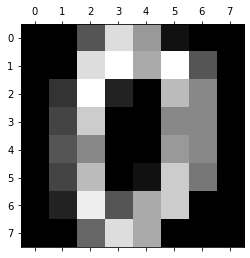

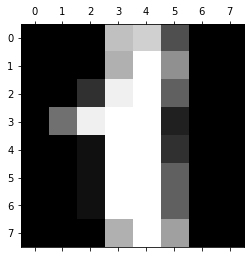

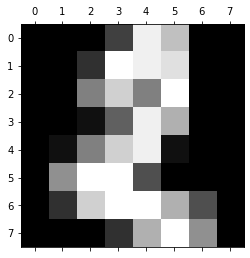

In [33]:
plt.gray()
for i in range(3): plt.matshow(digits.images[i])
plt.show()

### Cluster the data

Flatten the images to obtain the vectors set

In [34]:
n_digits_samples = len(digits.images)
X_digits = digits.images.reshape((n_digits_samples, -1))

In [35]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  1., 10., ..., 10.,  9.,  0.],
       [ 0.,  0., 15., ...,  6.,  2.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [36]:
X_digits.shape

(537, 64)

In [37]:
y_digits = digits.target

In [38]:
y_digits

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,

Prepare a models list and populate it with all the trials results

In [39]:
digits_models_list = list()

for linkage, n_clusters, affinity in itertools.product(linkage_list, n_clusters_list, affinity_list):
    model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters, affinity=affinity)
    model.fit(X_digits)
    
    entry = {
        'linkage': linkage,
        'n_clusters': n_clusters,
        'affinity': affinity,
        'model': model, 
        'v_measure_score': v_measure_score(labels_true=y_digits, labels_pred=model.labels_),
        'davies_bouldin_score': davies_bouldin_score(X=X_digits, labels=model.labels_)
    }
    digits_models_list.append(entry)

Determine the best model for each algorithm (linkage)

The v_measure scores into a \[0 ,1\] interval the similarity between real and predicted labels.
A value near 1, denotes a good classification. The zero value is the worst case.
In the other side, the Davies-Bouldin internal measure, scores as zero the best clustering case.

So we must lookup for the **maximum V-measure index value** and the **minimum Davies-Bouldin index** case for each algorithm.

In [40]:
digits_best_v_measure_dict = {}
digits_best_davies_bouldin_dict = {}

for model in digits_models_list:
    t = model['linkage']
    if t not in digits_best_v_measure_dict or model['v_measure_score'] > digits_best_v_measure_dict.get(t)['v_measure_score']:
        digits_best_v_measure_dict[t] = model
    if t not in digits_best_davies_bouldin_dict or model['davies_bouldin_score'] < digits_best_davies_bouldin_dict.get(t)['davies_bouldin_score']:
        digits_best_davies_bouldin_dict[t] = model

### V-measure score

In [41]:
digits_best_v_measure_list = list(digits_best_v_measure_dict.values())
digits_best_v_measure_list

[{'linkage': 'complete',
  'n_clusters': 5,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='complete', n_clusters=5),
  'v_measure_score': 0.7522415852277589,
  'davies_bouldin_score': 1.5695570289549892},
 {'linkage': 'average',
  'n_clusters': 5,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='average', n_clusters=5),
  'v_measure_score': 0.7757213374727294,
  'davies_bouldin_score': 1.3377517511751196},
 {'linkage': 'ward',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(n_clusters=3),
  'v_measure_score': 0.7996129633629272,
  'davies_bouldin_score': 1.5866989473372788}]

In short, the best V-measure score indicates that: 

- the best score for *complete-linkage* and *average-linkage* algorithms are a **5 clusters** classifications
- the best score according to *ward-linkage* is a **3 cluters** classification

Now will select the best one according to the V_measure score

In [42]:
digits_best_v_measure_model = None

for model in digits_models_list:
    if digits_best_v_measure_model is None or model['v_measure_score'] > digits_best_v_measure_model['v_measure_score']:
        digits_best_v_measure_model = model

In [43]:
digits_best_v_measure_model

{'linkage': 'ward',
 'n_clusters': 3,
 'affinity': 'euclidean',
 'model': AgglomerativeClustering(n_clusters=3),
 'v_measure_score': 0.7996129633629272,
 'davies_bouldin_score': 1.5866989473372788}

As we already know, it seems that the best V-measure scored case is the one with 3 clusters, using the *ward* function

### V-measure contingency matrix

The contingency table will tell us more details

In [44]:
digits_y_best_v_measure_model_labels = digits_best_v_measure_model['model'].labels_

digits_best_v_measure_model_contingency_matrix = contingency_matrix(labels_true=y_digits, labels_pred=digits_y_best_v_measure_model_labels)
digits_best_v_measure_model_contingency_matrix

array([[  0, 178,   0],
       [155,   0,  27],
       [ 11,   0, 166]])

In [45]:
pretty_print_cm(cm=digits_best_v_measure_model_contingency_matrix, true_classes=digits_y_classes)

           Cluster  1 Cluster  2 Cluster  3
Class  0:           0        178          0
Class  1:         155          0         27
Class  2:          11          0        166


As seen in contingency table (looking up for the top values) the assignment of classes is as follows:

- Class 0 has been assigned to cluster 2
- Class 1 has been assigned to cluster 1
- Class 2 has been assigned to cluster 3

We can summarize the clustering errors as:

- Class 0 is weel classified
- Class 1 has 27 missclassified samples at cluster 3 (class 2)
- Class 2 has 11 missclassified samples at cluster 1 (class 1)

So, there are cross-contamination between class 1 and 2.

### Davies-Bouldin score

In [46]:
digits_best_davies_bouldin_list = list(digits_best_davies_bouldin_dict.values())
digits_best_davies_bouldin_list

[{'linkage': 'complete',
  'n_clusters': 4,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='complete', n_clusters=4),
  'v_measure_score': 0.6946111446511541,
  'davies_bouldin_score': 1.5562113134065472},
 {'linkage': 'average',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='average', n_clusters=3),
  'v_measure_score': 0.706270131831537,
  'davies_bouldin_score': 1.2732958293059486},
 {'linkage': 'ward',
  'n_clusters': 2,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(),
  'v_measure_score': 0.7327627046643861,
  'davies_bouldin_score': 1.3511623886223687}]

Top Davies-Bouldin score podium indicates that: 

- for the *complete-linkage* a **4 clusters** partition is proposed
- for the *average-linkage* a **3 clusters** partition is his best solution
- for the *ward* algorithm a **binary cluster** is its best purposed partition

Now will select the best one according to the Davies-Boudin score

In [47]:
digits_best_davies_bouldin_model = None

for model in digits_models_list:
    if digits_best_davies_bouldin_model is None or model['davies_bouldin_score'] < digits_best_davies_bouldin_model['davies_bouldin_score']:
        digits_best_davies_bouldin_model = model

In [48]:
digits_best_davies_bouldin_model

{'linkage': 'average',
 'n_clusters': 3,
 'affinity': 'euclidean',
 'model': AgglomerativeClustering(linkage='average', n_clusters=3),
 'v_measure_score': 0.706270131831537,
 'davies_bouldin_score': 1.2732958293059486}

### Davies-Boudin contingency matrix

The contingency table will tell us more details

In [49]:
digits_y_best_davies_bouldin_model_labels = digits_best_davies_bouldin_model['model'].labels_

digits_best_davies_bouldin_model_contingency_matrix = contingency_matrix(labels_true=y_digits, labels_pred=digits_y_best_davies_bouldin_model_labels)
digits_best_davies_bouldin_model_contingency_matrix

array([[  0,   0, 178],
       [128,  54,   0],
       [177,   0,   0]])

In [50]:
pretty_print_cm(cm=digits_best_davies_bouldin_model_contingency_matrix, true_classes=digits_y_classes)

           Cluster  1 Cluster  2 Cluster  3
Class  0:           0          0        178
Class  1:         128         54          0
Class  2:         177          0          0


As seen in contingency table (looking up for the max values) the assignment of classes is as follows:

- Class 0 has been assigned to cluster 3
- Class 1 and class 2 have been assigned to cluster 1

We can summarize the clustering errors as:

- Class 0 and class 2 are correctly classified
- Class 1 is missclassified almost enterely into the same cluster than class 2

### Conclussions

TODO